# 준비

## 라이브러리 호출

In [1]:
import os
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")

Version:  2.4.1
Eager mode:  True
Hub version:  0.12.0
GPU is available


## 데이터 로드

In [2]:
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

NameError: name 'keras' is not defined

## 데이터 탐색

In [3]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
# example
train_examples_batch[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'This is a big step down after the surprisingly enjoyable original. This sequel isn\'t nearly as fun as part one, and it instead spends too much time on plot development. Tim Thomerson is still the best thing about this series, but his wisecracking is toned down in this entry. The performances are all adequate, but this time the script lets us down. The action is merely routine and the plot is only mildly interesting, so I need lots of silly laughs in order to stay entertained during a "Trancers" movie. Unfortunately, the laughs are few and far between, and so, this film is watchable at best.'>

In [4]:
# labels
train_labels_batch

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0], dtype=int64)>

# 모델링

문장을 임베딩 벡터로 변환

임베딩 벡터로 변환하는 모델을 Hub에서 받아옴

In [5]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding,
                           input_shape=[],
                           dtype=tf.string,
                           trainable=True)

In [6]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 50)                48190600  
_________________________________________________________________
dense (Dense)                (None, 16)                816       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['acc'])

# 모델 훈련

In [9]:
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=10,
                    validation_data=validation_data.batch(512),
                    verbose=1)

Epoch 1/10
30/30 [==============================] - 3s 68ms/step - loss: 0.6548 - acc: 0.5403 - val_loss: 0.5641 - val_acc: 0.6815
Epoch 2/10
30/30 [==============================] - 2s 57ms/step - loss: 0.5191 - acc: 0.7122 - val_loss: 0.4427 - val_acc: 0.7821
Epoch 3/10
30/30 [==============================] - 2s 57ms/step - loss: 0.3740 - acc: 0.8424 - val_loss: 0.3637 - val_acc: 0.8443
Epoch 4/10
30/30 [==============================] - 2s 57ms/step - loss: 0.2649 - acc: 0.9023 - val_loss: 0.3232 - val_acc: 0.8560
Epoch 5/10
30/30 [==============================] - 2s 57ms/step - loss: 0.1966 - acc: 0.9316 - val_loss: 0.3072 - val_acc: 0.8618
Epoch 6/10
30/30 [==============================] - 2s 57ms/step - loss: 0.1360 - acc: 0.9573 - val_loss: 0.3019 - val_acc: 0.8702
Epoch 7/10
30/30 [==============================] - 2s 57ms/step - loss: 0.0971 - acc: 0.9759 - val_loss: 0.3057 - val_acc: 0.8686
Epoch 8/10
30/30 [==============================] - 2s 57ms/step - loss: 0.0686 - a

# 모델 평가

In [10]:
results = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
    print("%s: %.3f" % (name, value))

49/49 - 1s - loss: 0.3749 - acc: 0.8520
loss: 0.375
acc: 0.852


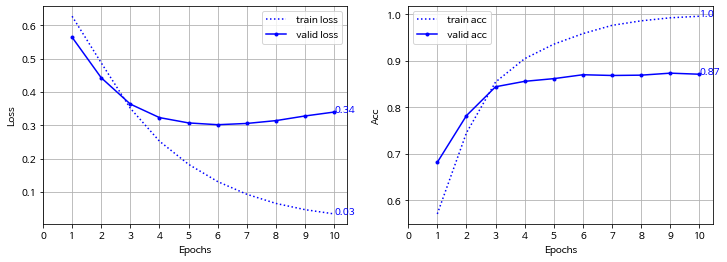

In [11]:
from Myfunc import show_lcurve
show_lcurve([history], [""], ["b"])